In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import pair_confusion_matrix, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier



In [2]:
df = pd.read_csv("/content/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.shape

(32581, 12)

Check Dublicated Value and remove the dublicates values from database

In [4]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [5]:
df.shape

(32581, 12)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(32416, 12)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [10]:
np.round(df.isnull().sum()*100/df.shape[0],3)

person_age                    0.000
person_income                 0.000
person_home_ownership         0.000
person_emp_length             2.736
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 9.548
loan_status                   0.000
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
dtype: float64

In [11]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [12]:
y.value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


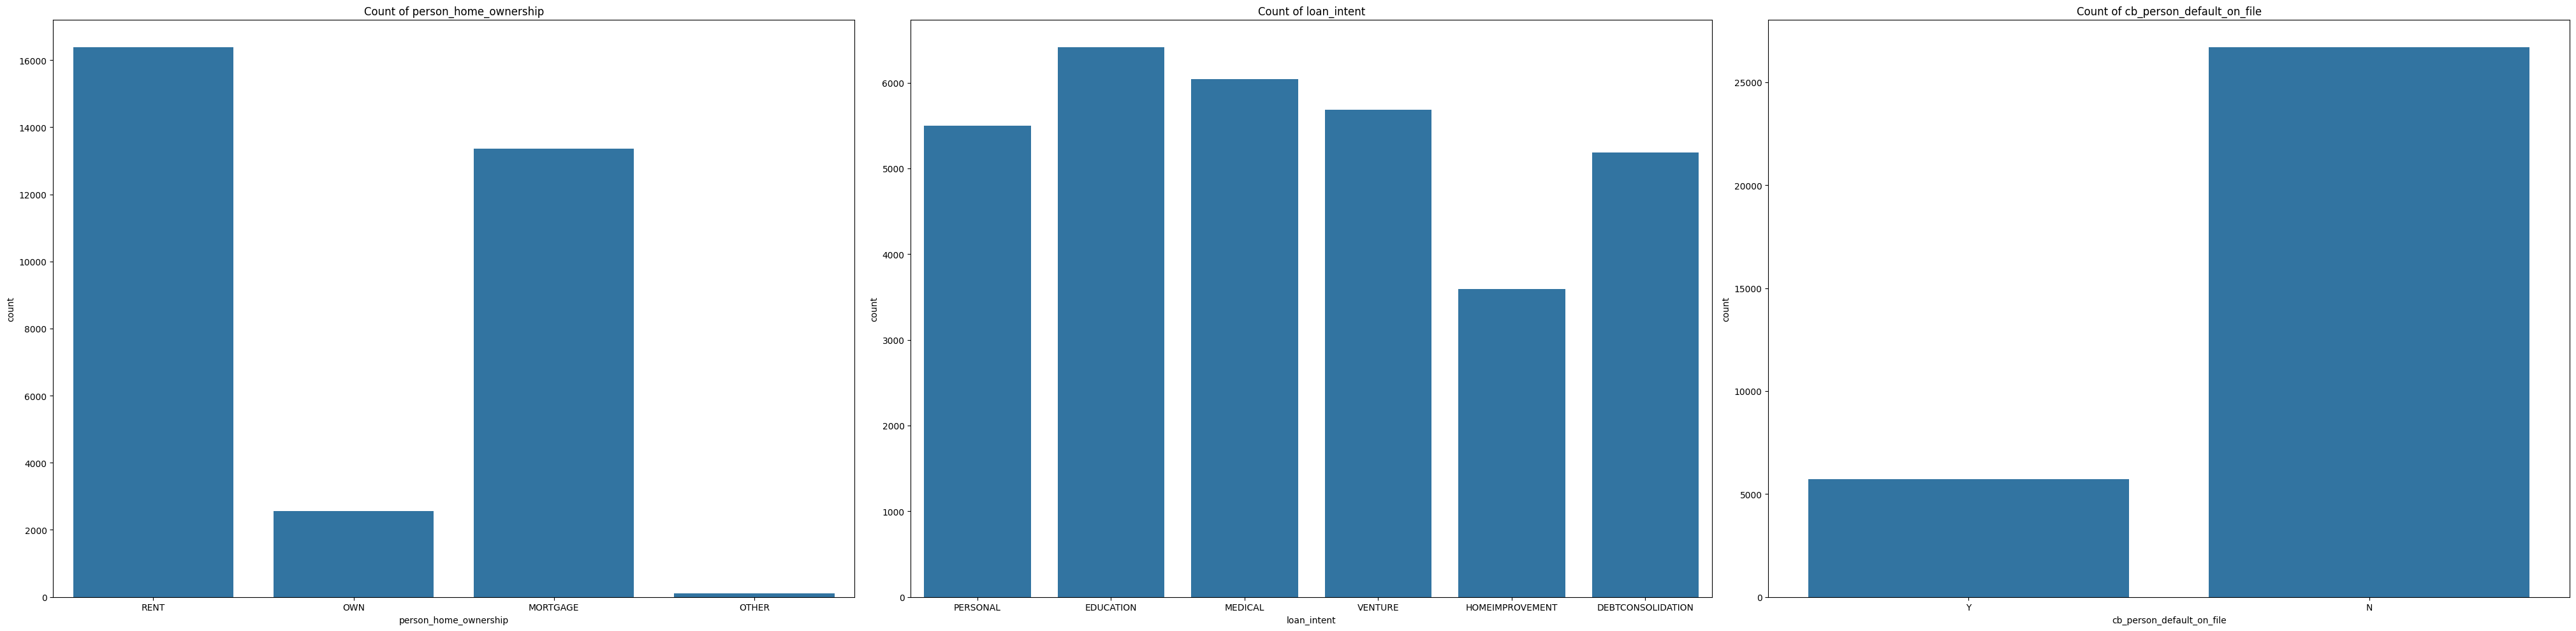

In [14]:
# 2. Counting categorical variables
plt.figure(figsize=(40.5, 10))
categorical_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.grid(False)
    plt.tight_layout()
plt.show()

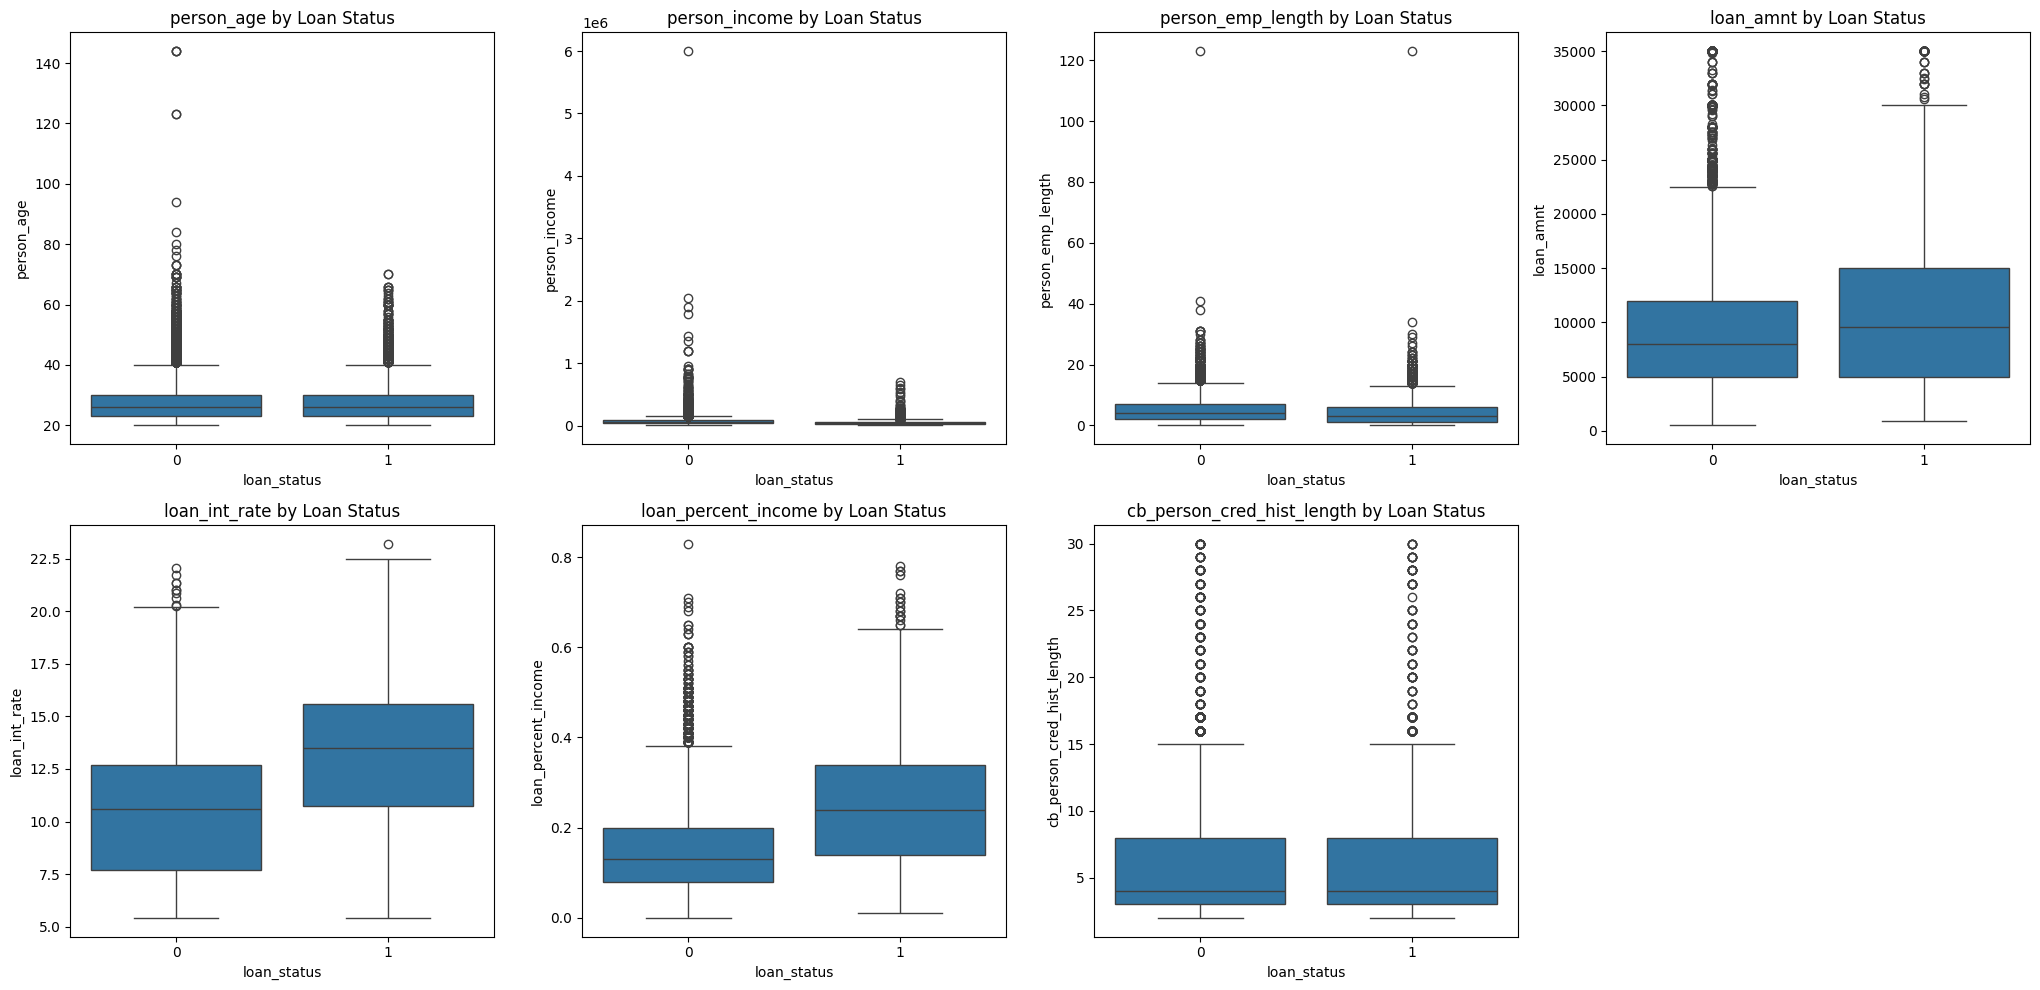

In [ ]:

# 4. Comparison of distributions
numerical_cols = ['person_age', 'person_income','person_emp_length', 'loan_amnt',
                  'loan_int_rate', 'loan_percent_income',
                  'cb_person_cred_hist_length']

# Boxplots chart
print()
print()
plt.figure(figsize=(20.5, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} by Loan Status')
    plt.grid(False)
plt.tight_layout()
plt.show()


Distribution of target variable 'Target':
loan_status
0    25327
1     7089
Name: count, dtype: int64


<ipython-input-15-9c536069540d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2')


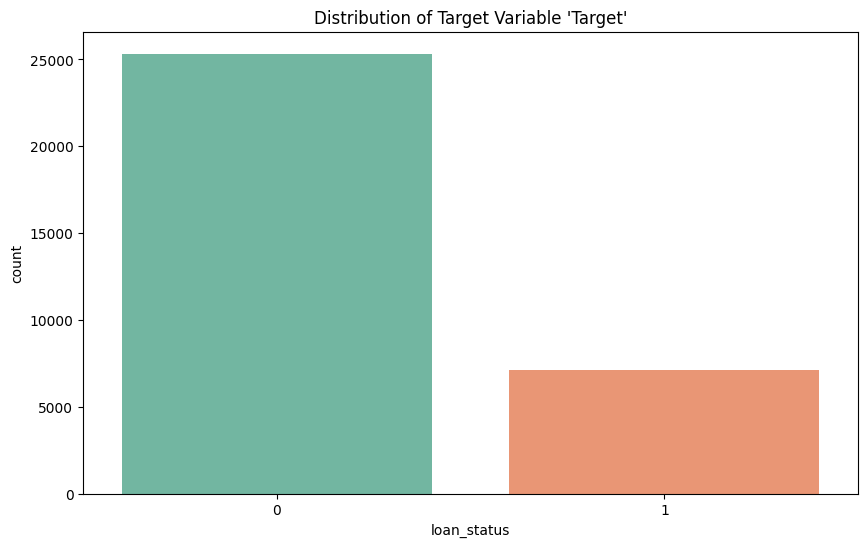

In [15]:
print("\nDistribution of target variable 'Target':")
print(df['loan_status'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

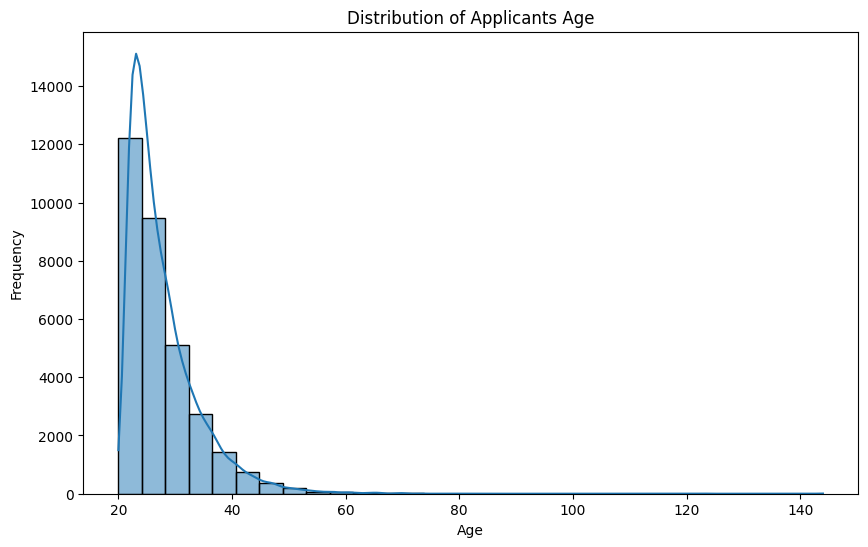

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_age',bins=30,kde=True)
plt.title('Distribution of Applicants Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

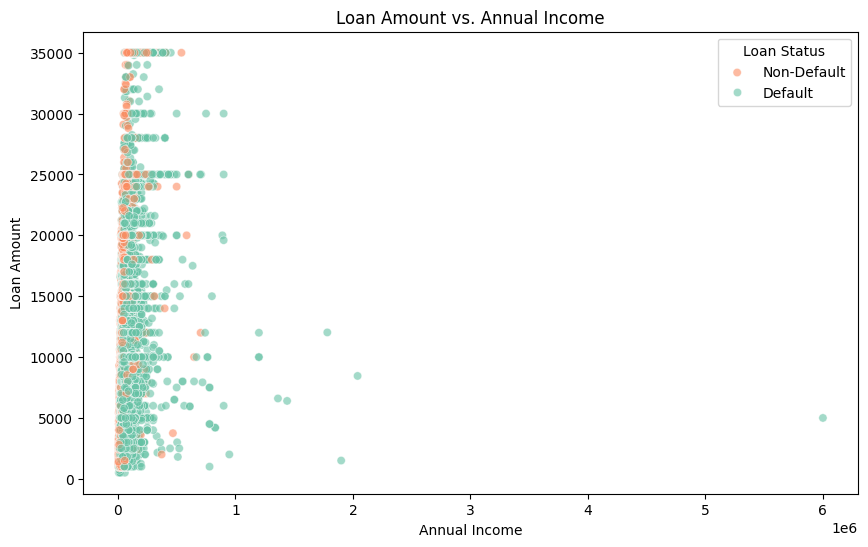

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6, palette='Set2')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

<ipython-input-33-bfe74370848b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_grade', y='loan_int_rate', palette='Set2')


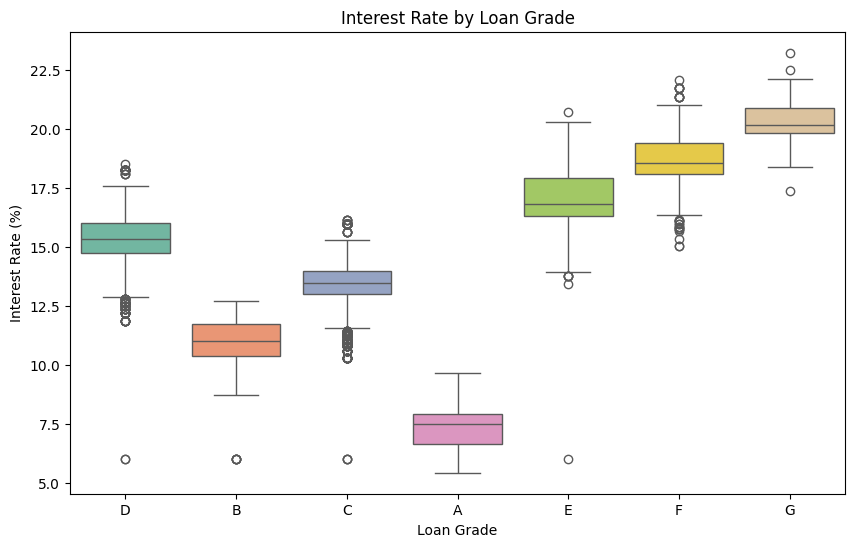

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_grade', y='loan_int_rate', palette='Set2')
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.grid(False)
plt.show()

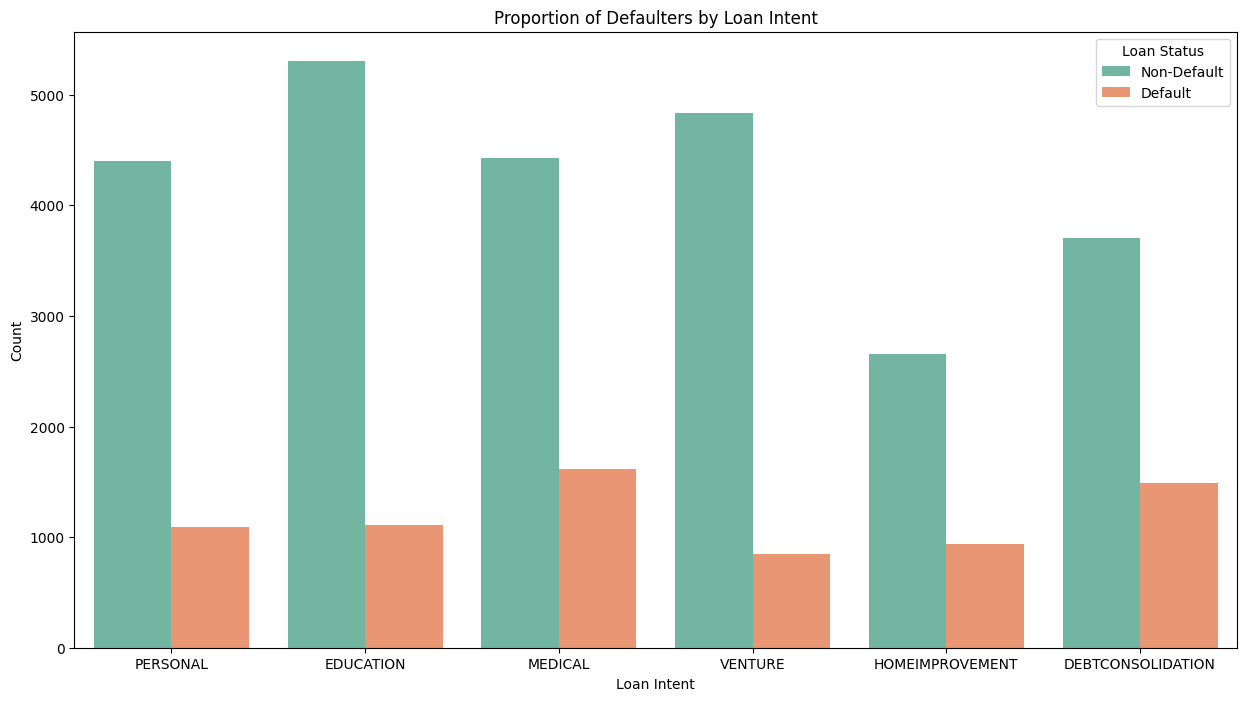

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='loan_intent', hue='loan_status', palette='Set2')
plt.title('Proportion of Defaulters by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

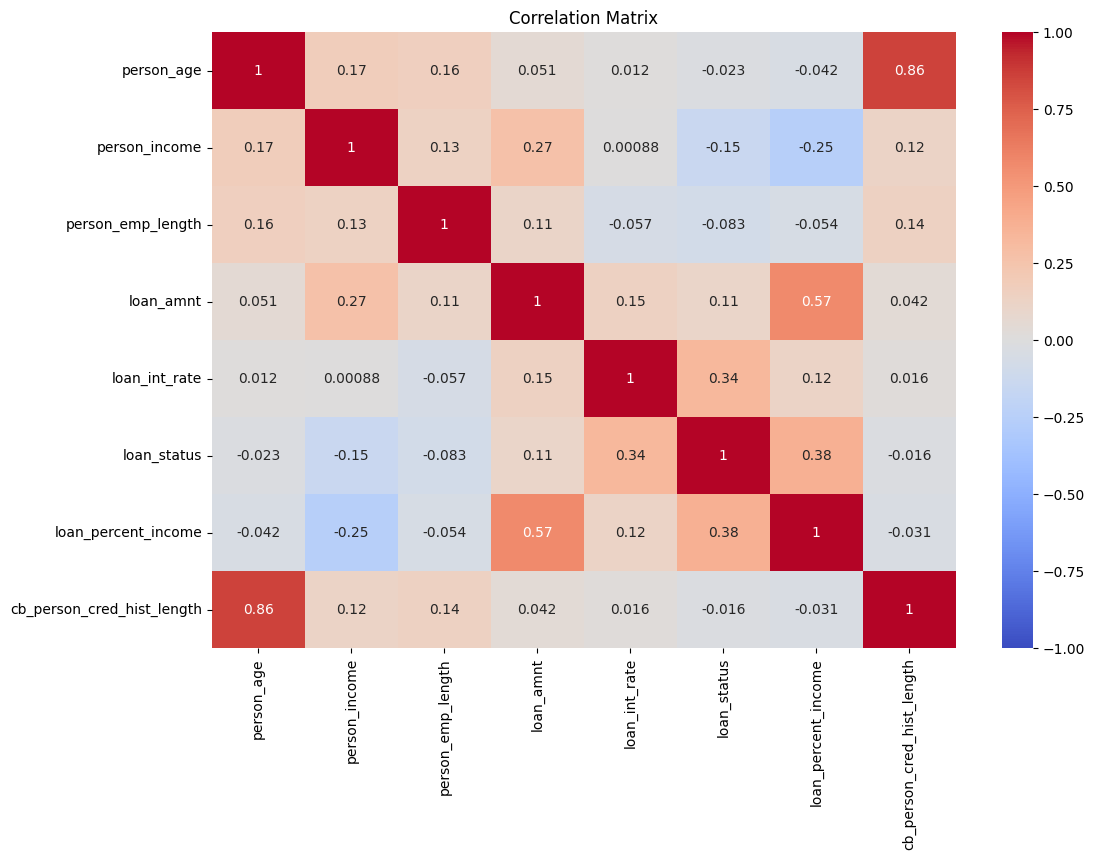

In [ ]:
# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


<Figure size 1050x800 with 0 Axes>

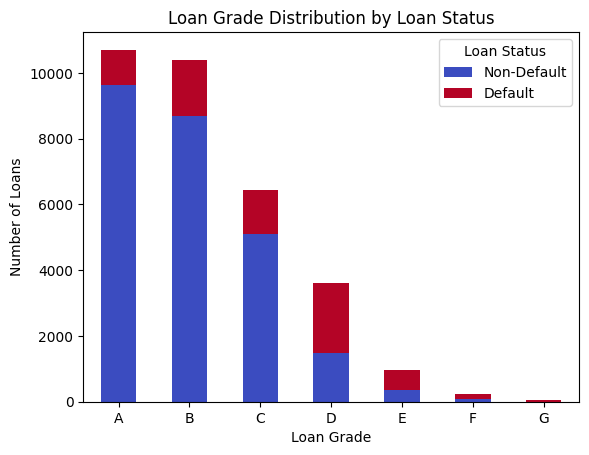

In [ ]:
plt.figure(figsize=(10.5, 8))
grade_status_counts = df.groupby(['loan_grade', 'loan_status']).size().unstack()
grade_status_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

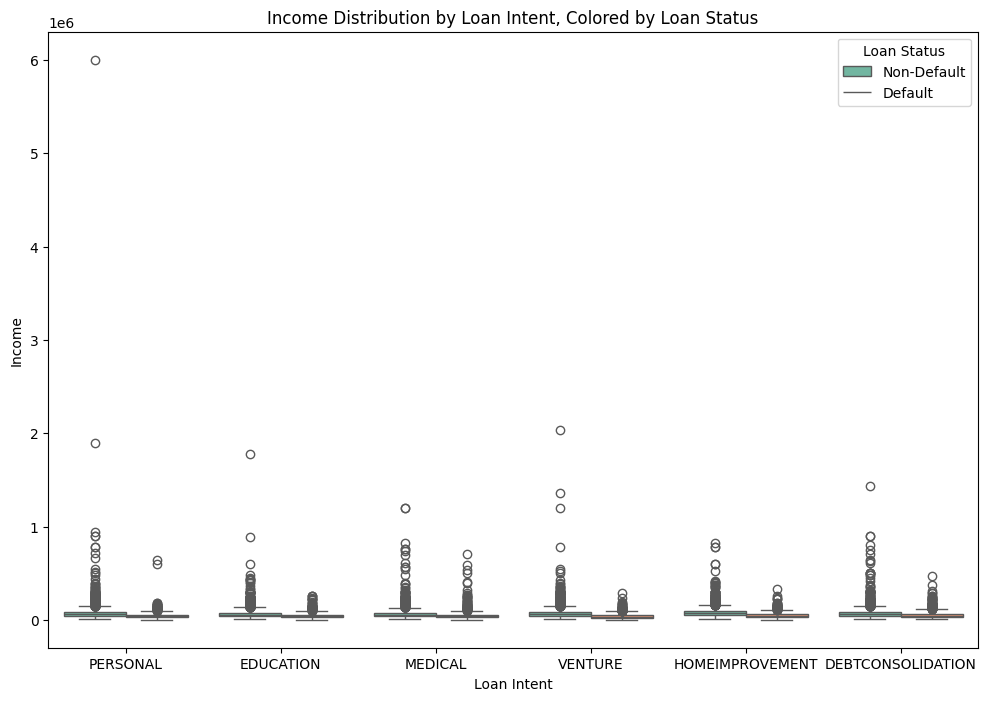

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='loan_intent', y='person_income', hue='loan_status', palette='Set2')
plt.title('Income Distribution by Loan Intent, Colored by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Income')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [18]:
# median = df.median()
# df.fillna(median, inplace=True)

In [17]:
df = df.dropna(subset=['person_emp_length', 'loan_int_rate'])
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [19]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Aplicando nas colunas transformando em númericas
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

# Viewing
label_encoder

<ipython-input-19-b60cb99c4179>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
<ipython-input-19-b60cb99c4179>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
<ipython-input-19-b60cb99c4179>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

LabelEncoder()

In [21]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [22]:
# Resources
X = df.drop(columns=['loan_status'])

# Target variable
y = df['loan_status']

In [23]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to dummy variables
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (22800, 11)
Viewing rows and columns given y train (22800,)


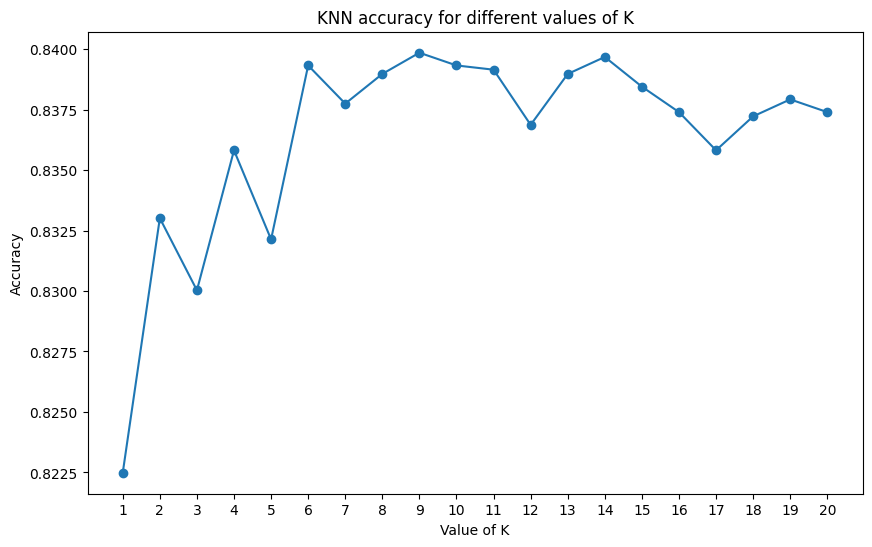

Best value of K: 9
Corresponding accuracy: 0.8398526574285213


In [24]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [

    # Naive Bayes Model
    GaussianNB(),

    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),

    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic regression model
    LogisticRegression(random_state=50),

    # Ada Boost Model
    AdaBoostClassifier(random_state=45),

    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(random_state=42),

    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(num_leaves=31,
                   boosting_type='gbdt',
                   bagging_fraction= 0.9,
                   learning_rate=0.05,
                   feature_fraction=0.9,
                   bagging_freq=50,
                   verbose=50),

    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=best_k),
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.8232894736842106
Testing Accuracy: 0.822136467286441
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.8830029819329942
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9286090159621119
-----------------
LogisticRegression(random_state=50)

Model 4: LogisticRegression

Training Accuracy: 0.8080701754385965
Testing Accuracy: 0.8030170145588493
-----------------
AdaBoostClassifier(random_state=45)

Model 5: AdaBoostClassifier

Training Accuracy: 0.8873245614035088
Testing Accuracy: 0.8915979652692511
-----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric

Model 1: GaussianNB
Training Accuracy: 0.8232894736842106
Testing Accuracy: 0.822136467286441


Confusion matrix 

 [[4197  244]
 [ 770  490]]

True Positives(TP) =  4197

True Negatives(TN) =  490

False Positives(FP) =  244

False Negatives(FN) =  770



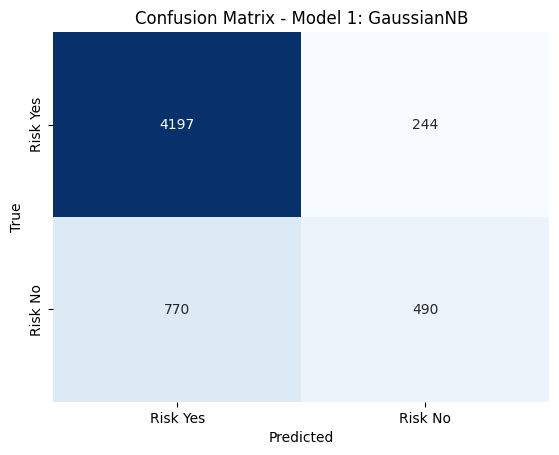

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8830029819329942


Confusion matrix 

 [[4096  345]
 [ 322  938]]

True Positives(TP) =  4096

True Negatives(TN) =  938

False Positives(FP) =  345

False Negatives(FN) =  322



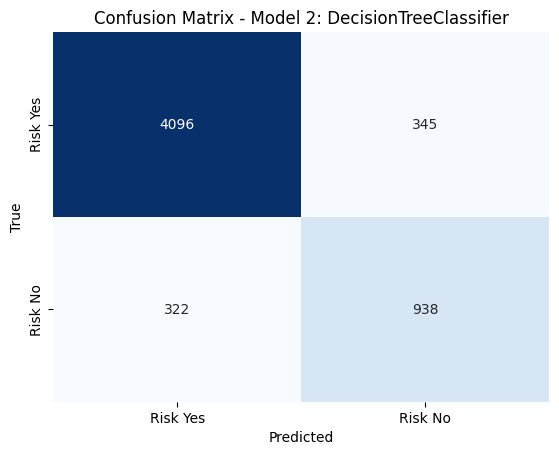

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9286090159621119


Confusion matrix 

 [[4411   30]
 [ 377  883]]

True Positives(TP) =  4411

True Negatives(TN) =  883

False Positives(FP) =  30

False Negatives(FN) =  377



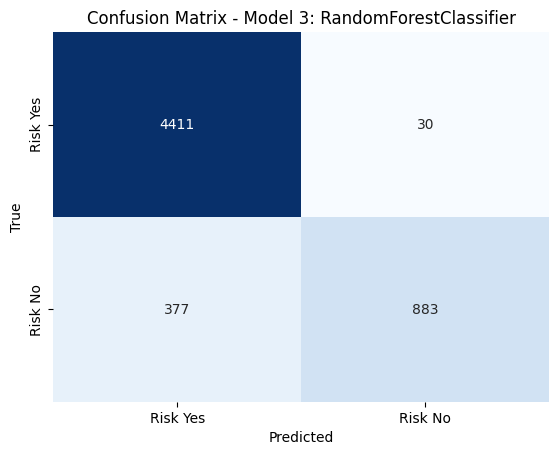

------------------
Model 4: LogisticRegression
Training Accuracy: 0.8080701754385965
Testing Accuracy: 0.8030170145588493


Confusion matrix 

 [[4369   72]
 [1051  209]]

True Positives(TP) =  4369

True Negatives(TN) =  209

False Positives(FP) =  72

False Negatives(FN) =  1051



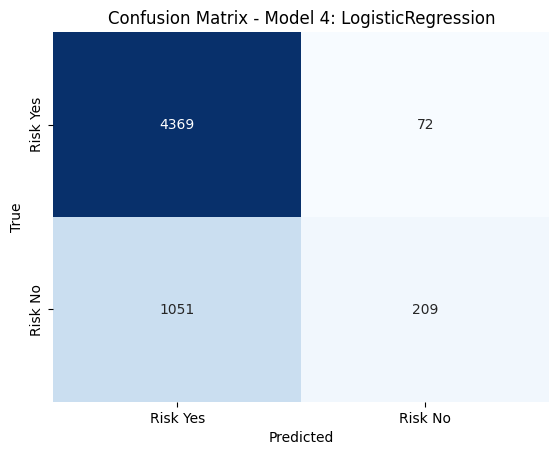

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8873245614035088
Testing Accuracy: 0.8915979652692511


Confusion matrix 

 [[4264  177]
 [ 441  819]]

True Positives(TP) =  4264

True Negatives(TN) =  819

False Positives(FP) =  177

False Negatives(FN) =  441



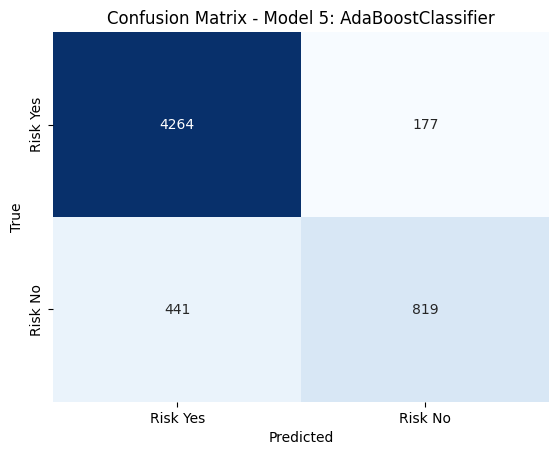

------------------
Model 6: XGBClassifier
Training Accuracy: 0.9602631578947368
Testing Accuracy: 0.9329942115418348


Confusion matrix 

 [[4402   39]
 [ 343  917]]

True Positives(TP) =  4402

True Negatives(TN) =  917

False Positives(FP) =  39

False Negatives(FN) =  343



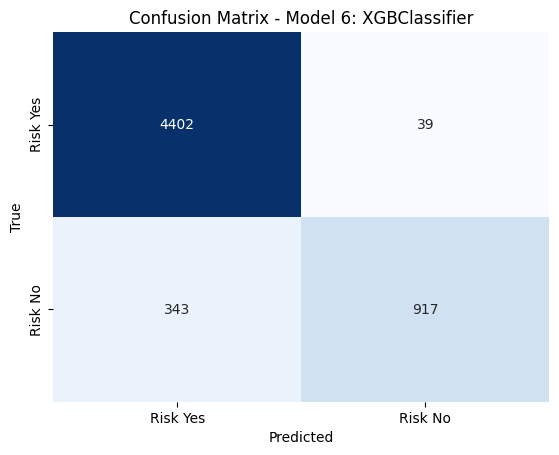

------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] Number of positive: 4928, number of negative: 17872
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.168138
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.002836 seconds
[LightGBM] [Info] Auto-choosing 

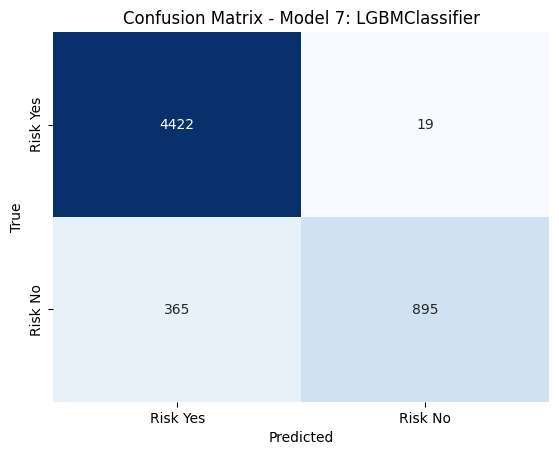

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.8621052631578947
Testing Accuracy: 0.8398526574285213


Confusion matrix 

 [[4185  256]
 [ 657  603]]

True Positives(TP) =  4185

True Negatives(TN) =  603

False Positives(FP) =  256

False Negatives(FN) =  657



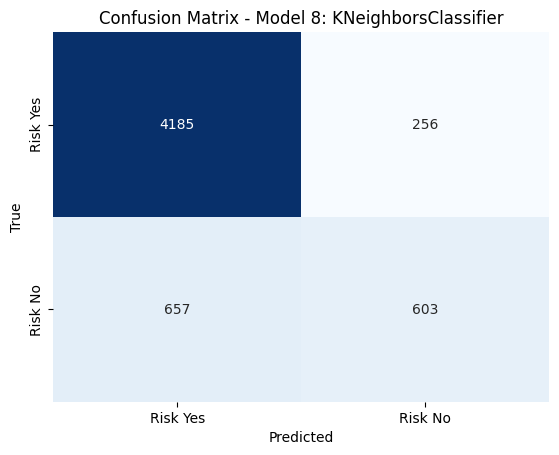

------------------


In [26]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Risk Yes", "Risk No"],
                yticklabels=["Risk Yes", "Risk No"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

In [27]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()

    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.8232894736842106
Testing Accuracy: 0.822136467286441

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4441
           1       0.67      0.39      0.49      1260

    accuracy                           0.82      5701
   macro avg       0.76      0.67      0.69      5701
weighted avg       0.81      0.82      0.80      5701



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.8830029819329942

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4441
           1       0.73      0.74      0.74      1260

    accuracy                           0.88      5701
   macro avg       0.83      0.83      0.83      5701
weighted avg       0.88      0.88      0.88      5701



Model 3: KNeighborsClassifier

Training Accuracy: 0.8776315789473684
Testing Accuracy: 0.83213471320820

In [30]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
# prompt: save the model .pkl file

import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)


In [39]:
X_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10314,21,70000,3,5.0,3,1,9700,12.53,0.14,0,4
10489,22,68000,0,6.0,3,0,3500,6.39,0.05,0,4
2478,21,14400,3,2.0,3,2,3000,13.43,0.21,1,3
21996,31,56000,3,4.0,3,0,7000,7.29,0.13,0,8
6399,24,38000,3,0.0,0,1,6000,10.39,0.16,0,2
...,...,...,...,...,...,...,...,...,...,...,...
837,22,110000,3,6.0,0,2,20000,13.72,0.18,0,3
349,25,165000,0,0.0,2,5,25000,19.74,0.15,0,4
8622,26,59500,0,9.0,5,0,12000,6.62,0.20,0,3
21321,28,32000,3,0.0,0,2,5500,15.96,0.17,1,8


In [35]:
X_test.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [37]:
model.predict[[34,50000,1,4.0,0,1,10000,6,0.21,0,8]]

TypeError: 'method' object is not subscriptable

In [40]:
import numpy as np

# Create a NumPy array from your input data
input_data = np.array([[34, 50000, 1, 4.0, 0, 1, 10000, 6, 0.21, 0, 8]])

# Use the predict method with the correctly formatted input
predictions = model.predict(input_data)

print(predictions)

[0]
